In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### ADMISSIONS table

In [ ]:
#mimic4_path = '../mimic-iii-clinical-database-1.4/'
# print
# read admissions table
admits = pd.read_csv('ADMISSIONS.csv')
# Pre-emptively don't include some columns that I don't need
admits = admits[['SUBJECT_ID','HADM_ID', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'INSURANCE', 'ETHNICITY']]
# Converts dates to a proper format
admits.ADMITTIME = pd.to_datetime(admits.ADMITTIME)
admits.DISCHTIME = pd.to_datetime(admits.DISCHTIME)
admits.DEATHTIME = pd.to_datetime(admits.DEATHTIME)
print(admits.shape)
admits.head()

(58976, 8)


,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaT,EMERGENCY,Private,WHITE
1,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaT,ELECTIVE,Medicare,WHITE
2,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,Medicare,WHITE
3,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaT,EMERGENCY,Private,WHITE
4,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaT,EMERGENCY,Private,WHITE


In [ ]:
# Compress the number of ethnicity categories
admits['ETHNICITY'].replace(regex=r'^ASIAN\D*', value='ASIAN', inplace=True)
admits['ETHNICITY'].replace(regex=r'^WHITE\D*', value='WHITE', inplace=True)
admits['ETHNICITY'].replace(regex=r'^HISPANIC\D*', value='HISPANIC/LATINO', inplace=True)
admits['ETHNICITY'].replace(regex=r'^BLACK\D*', value='BLACK/AFRICAN AMERICAN', inplace=True)
admits['ETHNICITY'].replace(['UNABLE TO OBTAIN', 'OTHER', 'PATIENT DECLINED TO ANSWER', 
                         'UNKNOWN/NOT SPECIFIED'], value='OTHER/UNKNOWN', inplace=True)
#take into consideration just the top-5 categories with biggest value_count, the others will fall into OTHER category
admits['ETHNICITY'].loc[~admits['ETHNICITY'].isin(admits['ETHNICITY'].value_counts().nlargest(5).index.tolist())] = 'OTHER/UNKNOWN'  
admits['ETHNICITY'].value_counts()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


WHITE                     41325
OTHER/UNKNOWN              7731
BLACK/AFRICAN AMERICAN     5785
HISPANIC/LATINO            2128
ASIAN                      2007
Name: ETHNICITY, dtype: int64

# DRGCODES table

In [ ]:
drg = pd.read_csv('DRGCODES.csv')
drg = drg.drop(columns=['ROW_ID','DESCRIPTION'])
print(drg.shape)
drg.head()

(125557, 6)


,SUBJECT_ID,HADM_ID,DRG_TYPE,DRG_CODE,DRG_SEVERITY,DRG_MORTALITY
0,2491,144486,HCFA,28,NaN,NaN
1,24958,162910,HCFA,110,NaN,NaN
2,18325,153751,HCFA,390,NaN,NaN
3,17887,182692,HCFA,14,NaN,NaN
4,11113,157980,HCFA,390,NaN,NaN


### PATIENTS table


In [ ]:
# read patients table
patients = pd.read_csv('PATIENTS.csv')
# Pre-emptively don't include some columns that I don't need
#pats = pats[['SUBJECT_ID', 'GENDER', 'DOB', 'DOD']]
patients.DOB = pd.to_datetime(pats.DOB)
patients.DOD = pd.to_datetime(pats.DOD)
print(patients.shape)
patients.head()
patients = patients.drop(columns=['ROW_ID'])
patients.head()

(46520, 8)


,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,249,F,2075-03-13,NaT,NaN,NaN,0
1,250,F,2164-12-27,2188-11-22,2188-11-22 00:00:00,NaN,1
2,251,M,2090-03-15,NaT,NaN,NaN,0
3,252,M,2078-03-06,NaT,NaN,NaN,0
4,253,F,2089-11-26,NaT,NaN,NaN,0


In [ ]:
full_dataframe = pd.merge(admits,patients)
full_dataframe = pd.merge(full_dataframe,drg)
print(full_dataframe.shape)
full_dataframe.head()

(125557, 18)


,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,DRG_TYPE,DRG_CODE,DRG_SEVERITY,DRG_MORTALITY
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaT,EMERGENCY,Private,WHITE,F,2131-05-07,NaT,NaN,NaN,0,HCFA,450,NaN,NaN
1,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaT,ELECTIVE,Medicare,WHITE,M,2082-07-17,NaT,NaN,NaN,0,HCFA,109,NaN,NaN
2,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,Medicare,WHITE,M,2082-07-17,NaT,NaN,NaN,0,MS,25,NaN,NaN
3,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,Medicare,WHITE,M,2082-07-17,NaT,NaN,NaN,0,APR,212,2.0,3.0
4,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaT,EMERGENCY,Medicare,WHITE,M,2082-07-17,NaT,NaN,NaN,0,APR,212,2.0,3.0


# Process Age

In [ ]:
import datetime
full_dataframe['ADMITYEAR'] = [dt.to_pydatetime().date().year for dt in full_dataframe['ADMITTIME']]
full_dataframe['DOBYear']= [dt.to_pydatetime().date().year for dt in full_dataframe['DOB']]
full_dataframe['AGE'] =  full_dataframe['ADMITYEAR']-full_dataframe['DOBYear']

# Create LOS attribute converting timedelta type into float 'days', 86400 seconds in a day
full_dataframe['STAY(days)'] = (full_dataframe['DISCHTIME'] - full_dataframe['ADMITTIME']).dt.total_seconds()/86400
full_dataframe = full_dataframe[full_dataframe['STAY(days)'] > 0]
# Verify LOS computation
full_dataframe[['ADMITTIME', 'DISCHTIME', 'STAY(days)']].head()

,ADMITTIME,DISCHTIME,STAY(days)
0,2196-04-09 12:26:00,2196-04-10 15:54:00,1.144444
1,2153-09-03 07:15:00,2153-09-08 19:10:00,5.496528
2,2157-10-18 19:34:00,2157-10-25 14:00:00,6.768056
3,2157-10-18 19:34:00,2157-10-25 14:00:00,6.768056
4,2157-10-18 19:34:00,2157-10-25 14:00:00,6.768056


In [ ]:
full_dataframe['AGE'] = pd.Series(np.where(full_dataframe['AGE']>89, full_dataframe['AGE'] - 210, full_dataframe['AGE']))


# Fill the duplicate data

In [ ]:
full_dataframe.isnull().sum()

SUBJECT_ID             0
HADM_ID                0
ADMITTIME              0
DISCHTIME              0
DEATHTIME         112953
ADMISSION_TYPE         0
INSURANCE              0
ETHNICITY              0
GENDER                 0
DOB                    0
DOD                79476
DOD_HOSP           93484
DOD_SSN            88153
EXPIRE_FLAG            0
DRG_TYPE               0
DRG_CODE               0
DRG_SEVERITY       58836
DRG_MORTALITY      58836
ADMITYEAR              0
DOBYear                0
AGE                  176
STAY(days)             0
dtype: int64

# Spread the existing values to the null values

In [ ]:
indices=full_dataframe[full_dataframe['AGE'].isnull()==True].index

for i in indices:
    rows = full_dataframe[full_dataframe['SUBJECT_ID']==full_dataframe.loc[i, 'SUBJECT_ID']]
    avg = np.mean(rows['AGE'])
    full_dataframe.loc[full_dataframe['SUBJECT_ID']==full_dataframe.loc[i,'SUBJECT_ID'],'AGE'] = avg

In [ ]:
indices=full_dataframe[full_dataframe['DRG_SEVERITY'].isnull()==True].index

for i in indices:
    rows = full_dataframe[full_dataframe['DRG_CODE']==full_dataframe.loc[i, 'DRG_CODE']]
    avg = mode(rows['DRG_SEVERITY'])[0][0]
    full_dataframe.loc[full_dataframe['DRG_CODE']==full_dataframe.loc[i,'DRG_CODE'],'DRG_SEVERITY'] = avg

In [ ]:
indices=full_dataframe[full_dataframe['DRG_MORTALITY'].isnull()==True].index

for i in indices:
    rows = full_dataframe[full_dataframe['DRG_CODE']==full_dataframe.loc[i, 'DRG_CODE']]
    avg = mode(rows['DRG_MORTALITY'])[0][0]
    full_dataframe.loc[full_dataframe['DRG_CODE']==full_dataframe.loc[i,'DRG_CODE'],'DRG_MORTALITY'] = avg

In [ ]:
full_dataframe.isnull().sum()

SUBJECT_ID             0
HADM_ID                0
ADMITTIME              0
DISCHTIME              0
DEATHTIME         112953
ADMISSION_TYPE         0
INSURANCE              0
ETHNICITY              0
GENDER                 0
DOB                    0
DOD                79476
DOD_HOSP           93484
DOD_SSN            88153
EXPIRE_FLAG            0
DRG_TYPE               0
DRG_CODE               0
DRG_SEVERITY       51735
DRG_MORTALITY      51735
ADMITYEAR              0
DOBYear                0
AGE                  174
STAY(days)             0
dtype: int64

# Delete duplicate data

In [ ]:
full_dataframe2 = full_dataframe.sort_values(by=['ADMITTIME'])
full_dataframe2 = full_dataframe2.drop_duplicates(subset='SUBJECT_ID', keep='first')
full_dataframe2

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,GENDER,DOB,...,DOD_SSN,EXPIRE_FLAG,DRG_TYPE,DRG_CODE,DRG_SEVERITY,DRG_MORTALITY,ADMITYEAR,DOBYear,AGE,STAY(days)
112299,82574,118464,2100-06-07 19:59:00,2100-06-09 17:09:00,NaT,EMERGENCY,Medicaid,OTHER/UNKNOWN,M,2044-04-23,...,NaN,0,APR,2073,3.0,3.0,2100,2044,60.0,1.881944
60055,29156,161773,2100-06-09 01:39:00,2100-06-19 08:15:00,2100-06-19 08:15:00,EMERGENCY,Private,WHITE,M,2028-04-23,...,2100-06-19 00:00:00,1,APR,1304,4.0,3.0,2100,2028,59.0,10.275000
16908,12001,173927,2100-06-14 04:55:00,2100-06-27 12:00:00,NaT,EMERGENCY,Medicare,WHITE,F,2028-10-27,...,NaN,0,HCFA,14,4.0,4.0,2100,2028,84.0,13.295139
37236,21081,159656,2100-06-14 12:02:00,2100-06-17 14:20:00,NaT,EMERGENCY,Medicaid,BLACK/AFRICAN AMERICAN,F,2067-04-01,...,NaN,0,HCFA,87,NaN,NaN,2100,2067,73.0,3.095833
70922,32096,158366,2100-06-22 03:04:00,2100-06-30 11:35:00,NaT,EMERGENCY,Private,WHITE,F,2070-12-13,...,NaN,0,HCFA,486,NaN,NaN,2100,2070,51.0,8.354861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27411,13243,143841,2201-07-16 14:22:00,2201-07-21 11:45:00,NaT,NEWBORN,Private,WHITE,M,2201-07-16,...,NaN,0,APR,6403,3.0,1.0,2201,2201,44.0,4.890972
47574,25913,147240,2201-07-17 17:23:00,2201-07-19 19:00:00,NaT,NEWBORN,Private,WHITE,M,2201-07-17,...,NaN,0,HCFA,390,NaN,NaN,2201,2201,75.0,2.067361
81215,59166,115359,2201-07-22 19:04:00,2201-07-26 15:00:00,NaT,EMERGENCY,Medicaid,WHITE,M,2169-05-02,...,NaN,0,APR,522,2.0,3.0,2201,2169,62.0,3.830556
17866,8982,192942,2201-07-24 17:44:00,2201-08-04 19:43:00,NaT,NEWBORN,Private,WHITE,M,2201-07-24,...,NaN,0,HCFA,385,NaN,NaN,2201,2201,70.0,11.082639


# Delete some columns

In [ ]:
full_dataframe2 = full_dataframe2.drop(columns=['DOD_HOSP','DOD_SSN','ETHNICITY','ADMITTIME','DISCHTIME','DEATHTIME','DOB','DOD','ADMITYEAR','DOBYear','SUBJECT_ID','HADM_ID'], axis=1)


In [ ]:
print(full_dataframe2.shape)
full_dataframe2.isnull().sum()

(46438, 10)


ADMISSION_TYPE        0
INSURANCE             0
GENDER                0
EXPIRE_FLAG           0
DRG_TYPE              0
DRG_CODE              0
DRG_SEVERITY      25457
DRG_MORTALITY     25457
AGE                  48
STAY(days)            0
dtype: int64

In [ ]:
full_dataframe2 = pd.read_csv('clean _dataframe_with_Null.csv')

# Null Values

# DRG_SEVERITY

(array([2224.,    0.,    0., 4959.,    0.,    0., 7171.,    0.,    0.,
        6627.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

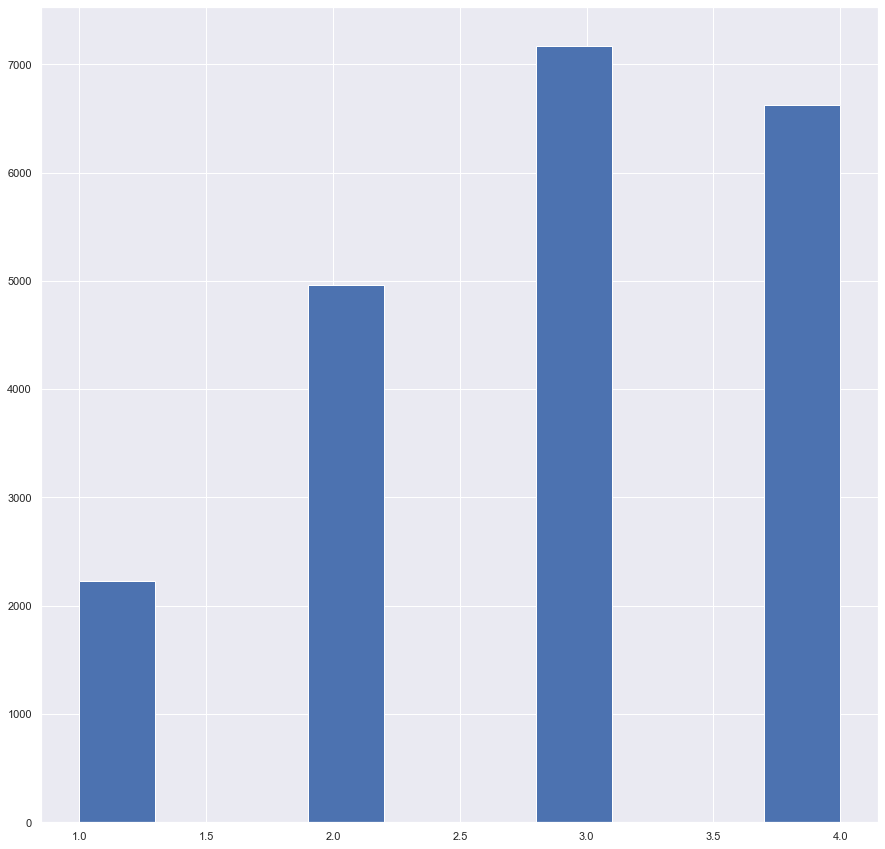

In [ ]:
plt.hist(full_dataframe2['DRG_SEVERITY'])

In [ ]:
from scipy.stats import mode
mod = mode(full_dataframe2['DRG_SEVERITY'])[0][0]
mod

3.0

In [ ]:
full_dataframe2['DRG_SEVERITY']=full_dataframe2['DRG_SEVERITY'].fillna(mod)

# DRG_MORTALITY

(array([5374.,    0.,    0., 4755.,    0.,    0., 4596.,    0.,    0.,
        6256.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

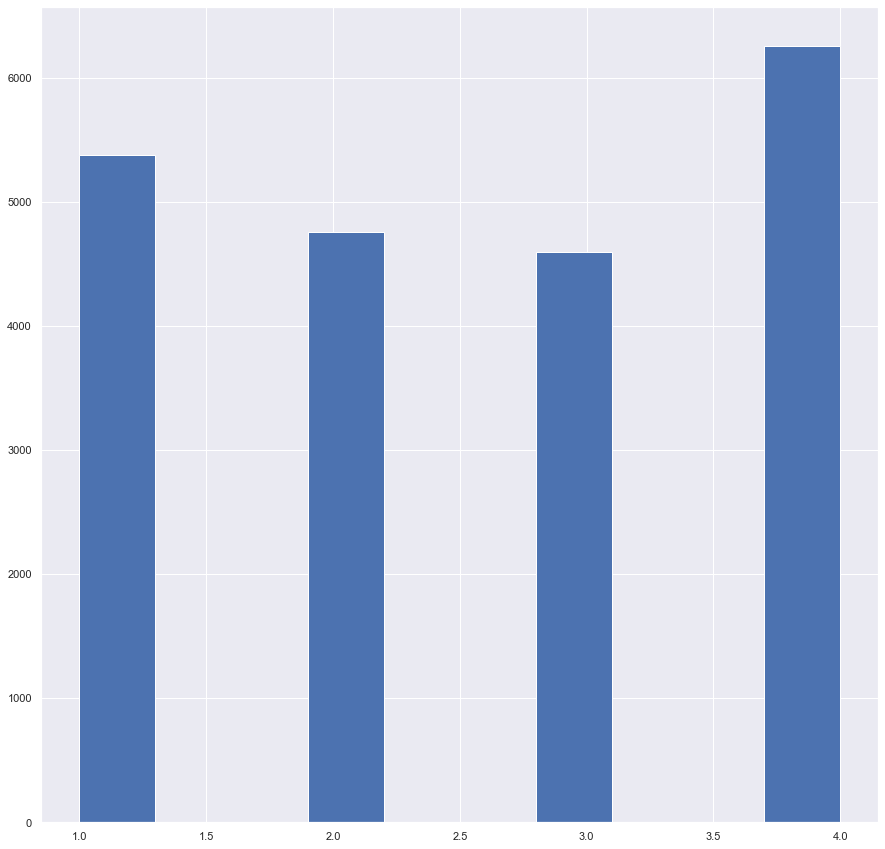

In [ ]:
plt.hist(full_dataframe2['DRG_MORTALITY'])

In [ ]:
from scipy.stats import mode
mod = mode(full_dataframe2['DRG_MORTALITY'])[0][0]
mod

4.0

In [ ]:
full_dataframe2['DRG_MORTALITY']=full_dataframe2['DRG_MORTALITY'].fillna(mod)

In [ ]:
print(full_dataframe2.shape)
full_dataframe2.isnull().sum()

(46438, 10)


ADMISSION_TYPE     0
INSURANCE          0
GENDER             0
EXPIRE_FLAG        0
DRG_TYPE           0
DRG_CODE           0
DRG_SEVERITY       0
DRG_MORTALITY      0
AGE               48
STAY(days)         0
dtype: int64

# AGE

(array([5617.,  386., 1593., 2150., 4511., 7190., 8587., 8410., 7481.,
         465.]),
 array([  0. ,  10.1,  20.2,  30.3,  40.4,  50.5,  60.6,  70.7,  80.8,
         90.9, 101. ]),
 <BarContainer object of 10 artists>)

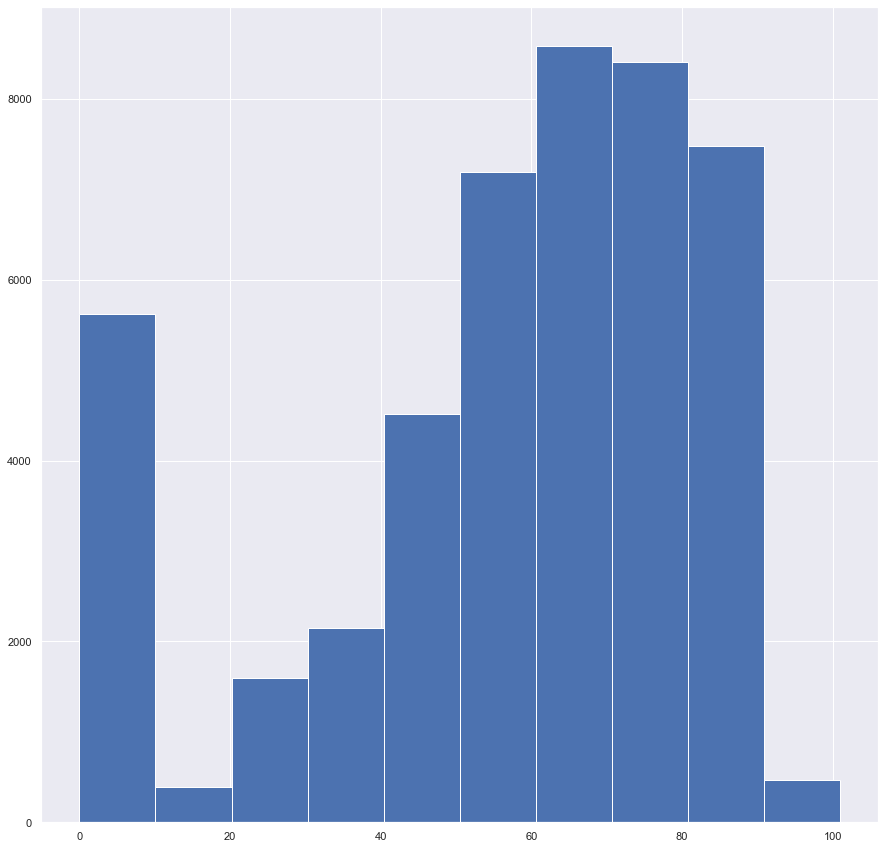

In [ ]:
plt.hist(full_dataframe2['AGE'])

In [ ]:
np.unique(full_dataframe2['AGE'])

array([  0.,   1.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan])

In [ ]:
#full_dataframe2['AGE'] = full_dataframe2.drop(full_dataframe2[full_dataframe2['AGE']<15])
r = full_dataframe2[full_dataframe2['AGE']<15].index
full_dataframe2 = full_dataframe2.drop(r)

(array([ 905., 1383., 1841., 3924., 5414., 7448., 7536., 6803., 5258.,
         261.]),
 array([ 15. ,  23.6,  32.2,  40.8,  49.4,  58. ,  66.6,  75.2,  83.8,
         92.4, 101. ]),
 <BarContainer object of 10 artists>)

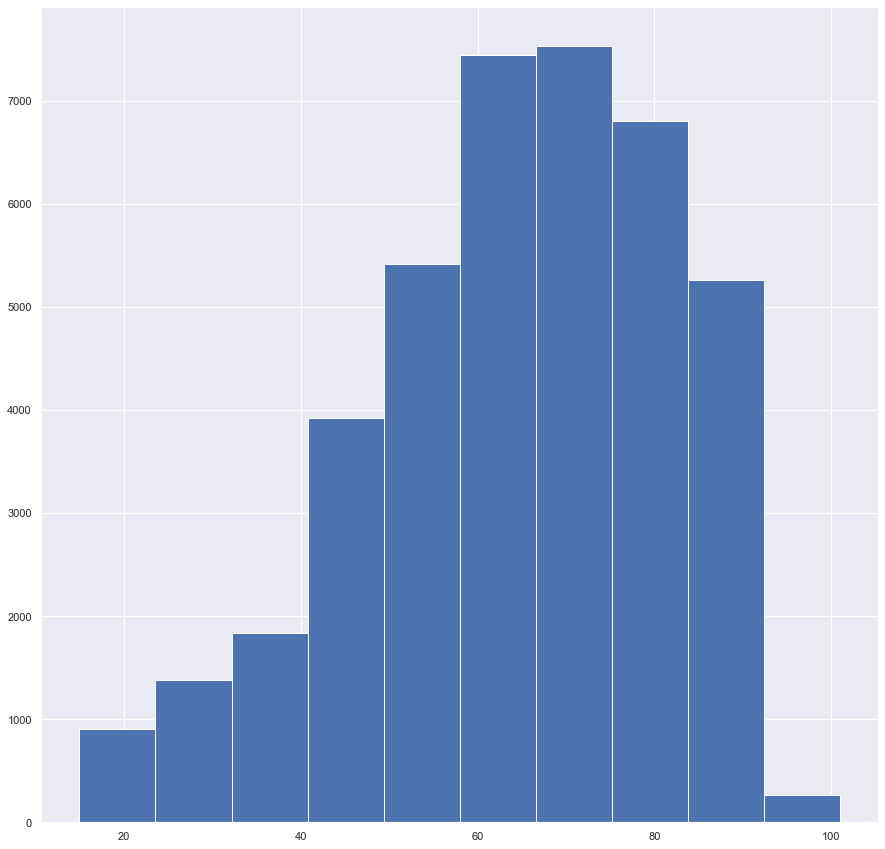

In [ ]:
plt.hist(full_dataframe2['AGE'])

In [ ]:
full_dataframe2 = full_dataframe2.dropna()
full_dataframe2.isnull().sum()

ADMISSION_TYPE    0
INSURANCE         0
GENDER            0
EXPIRE_FLAG       0
DRG_TYPE          0
DRG_CODE          0
DRG_SEVERITY      0
DRG_MORTALITY     0
AGE               0
STAY(days)        0
dtype: int64

In [ ]:
full_dataframe2

,ADMISSION_TYPE,INSURANCE,GENDER,EXPIRE_FLAG,DRG_TYPE,DRG_CODE,DRG_SEVERITY,DRG_MORTALITY,AGE,STAY(days)
112299,EMERGENCY,Medicaid,M,0,APR,2073,3.0,3.0,60.0,1.881944
60055,EMERGENCY,Private,M,1,APR,1304,4.0,3.0,59.0,10.275000
16908,EMERGENCY,Medicare,F,0,HCFA,14,4.0,4.0,84.0,13.295139
37236,EMERGENCY,Medicaid,F,0,HCFA,87,3.0,4.0,73.0,3.095833
70922,EMERGENCY,Private,F,0,HCFA,486,3.0,4.0,51.0,8.354861
...,...,...,...,...,...,...,...,...,...,...
27411,NEWBORN,Private,M,0,APR,6403,3.0,1.0,44.0,4.890972
47574,NEWBORN,Private,M,0,HCFA,390,3.0,4.0,75.0,2.067361
81215,EMERGENCY,Medicaid,M,0,APR,522,2.0,3.0,62.0,3.830556
17866,NEWBORN,Private,M,0,HCFA,385,3.0,4.0,70.0,11.082639


# Convert them to numerical

In [ ]:
full_dataframe2['ADMISSION_TYPE'] = full_dataframe2['ADMISSION_TYPE'].replace(
    np.unique(full_dataframe2['ADMISSION_TYPE']), list(range(len(np.unique(full_dataframe2['ADMISSION_TYPE'])))))

full_dataframe2['INSURANCE'] = full_dataframe2['INSURANCE'].replace(
    np.unique(full_dataframe2['INSURANCE']), list(range(len(np.unique(full_dataframe2['INSURANCE'])))))

full_dataframe2['GENDER'] = full_dataframe2['GENDER'].replace(
    np.unique(full_dataframe2['GENDER']), list(range(len(np.unique(full_dataframe2['GENDER'])))))

full_dataframe2['DRG_TYPE'] = full_dataframe2['DRG_TYPE'].replace(
    np.unique(full_dataframe2['DRG_TYPE']), list(range(len(np.unique(full_dataframe2['DRG_TYPE'])))))

full_dataframe2['DRG_CODE'] = full_dataframe2['DRG_CODE'].replace(
    np.unique(full_dataframe2['DRG_CODE']), list(range(len(np.unique(full_dataframe2['DRG_CODE'])))))

In [ ]:
full_dataframe2

,ADMISSION_TYPE,INSURANCE,GENDER,EXPIRE_FLAG,DRG_TYPE,DRG_CODE,DRG_SEVERITY,DRG_MORTALITY,AGE,STAY(days)
112299,1,1,1,0,0,887,3.0,3.0,60.0,1.881944
60055,1,3,1,1,0,731,4.0,3.0,59.0,10.275000
16908,1,2,0,0,1,13,4.0,4.0,84.0,13.295139
37236,1,1,0,0,1,80,3.0,4.0,73.0,3.095833
70922,1,3,0,0,1,435,3.0,4.0,51.0,8.354861
...,...,...,...,...,...,...,...,...,...,...
27411,2,3,1,0,0,1317,3.0,1.0,44.0,4.890972
47574,2,3,1,0,1,349,3.0,4.0,75.0,2.067361
81215,1,1,1,0,0,466,2.0,3.0,62.0,3.830556
17866,2,3,1,0,1,344,3.0,4.0,70.0,11.082639


# Standardize the continuous data

In [ ]:
full_dataframe3 = full_dataframe2

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scale = MinMaxScaler(feature_range=(0, 1))
full_dataframe3[['AGE','STAY(days)']] = scale.fit_transform(full_dataframe3[['AGE','STAY(days)']])


In [ ]:
full_dataframe3

,ADMISSION_TYPE,INSURANCE,GENDER,EXPIRE_FLAG,DRG_TYPE,DRG_CODE,DRG_SEVERITY,DRG_MORTALITY,AGE,STAY(days)
112299,1,1,1,0,0,887,3.0,3.0,0.523256,0.006373
60055,1,3,1,1,0,731,4.0,3.0,0.511628,0.034857
16908,1,2,0,0,1,13,4.0,4.0,0.802326,0.045107
37236,1,1,0,0,1,80,3.0,4.0,0.674419,0.010492
70922,1,3,0,0,1,435,3.0,4.0,0.418605,0.028340
...,...,...,...,...,...,...,...,...,...,...
27411,2,3,1,0,0,1317,3.0,1.0,0.337209,0.016585
47574,2,3,1,0,1,349,3.0,4.0,0.697674,0.007002
81215,1,1,1,0,0,466,2.0,3.0,0.546512,0.012986
17866,2,3,1,0,1,344,3.0,4.0,0.639535,0.037598


# Check Correlation

<AxesSubplot:>

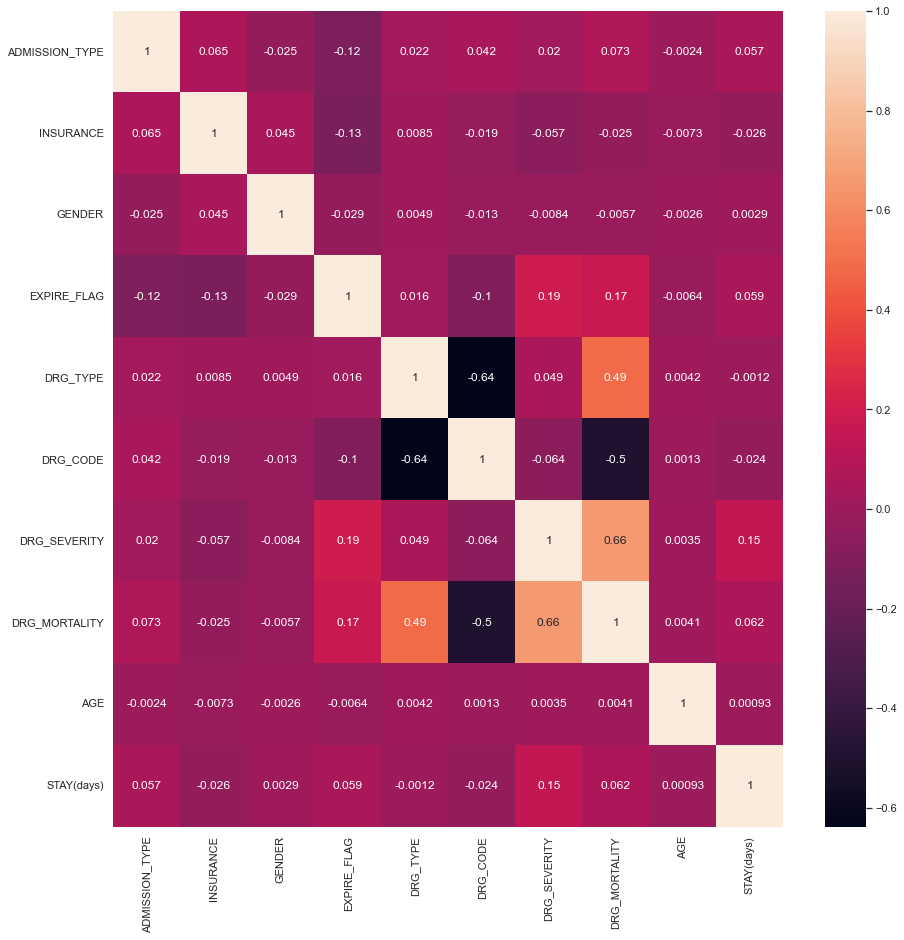

In [ ]:
import seaborn as sn
sn.set(rc={'figure.figsize':(15,15)})
sn.heatmap(full_dataframe3.corr(), annot=True)

# Categorical Variables

In [ ]:
one_hot_encoded_data = pd.get_dummies(full_dataframe3, columns = ['ADMISSION_TYPE', 'INSURANCE', 'GENDER', 'EXPIRE_FLAG', 'DRG_TYPE',
       'DRG_CODE', 'DRG_SEVERITY'])

NameError: ignored

In [ ]:
# save this version of the dataframe to a csv. It will be used as baseline for our prediction tasks
full_dataframe2.to_csv('final_data.csv')

# One-hat Encoding

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CS220/final_clean_data.csv')
data

,Unnamed: 0,AGE,STAY(days),DRG_SEVERITY_1.0,DRG_SEVERITY_2.0,DRG_SEVERITY_3.0,DRG_SEVERITY_4.0,DRG_MORTALITY_1.0,DRG_MORTALITY_2.0,DRG_MORTALITY_3.0,DRG_MORTALITY_4.0,DRG_TYPE_0,DRG_TYPE_1,DRG_TYPE_2,EXPIRE_FLAG_0,EXPIRE_FLAG_1
0,0,0.523256,0.006373,0,0,1,0,0,0,1,0,1,0,0,1,0
1,1,0.511628,0.034857,0,0,0,1,0,0,1,0,1,0,0,0,1
2,2,0.802326,0.045107,0,0,0,1,0,0,0,1,0,1,0,1,0
3,3,0.674419,0.010492,0,0,1,0,0,0,0,1,0,1,0,1,0
4,4,0.418605,0.028340,0,0,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40768,40768,0.337209,0.016585,0,0,1,0,1,0,0,0,1,0,0,1,0
40769,40769,0.697674,0.007002,0,0,1,0,0,0,0,1,0,1,0,1,0
40770,40770,0.546512,0.012986,0,1,0,0,0,0,1,0,1,0,0,1,0
40771,40771,0.639535,0.037598,0,0,1,0,0,0,0,1,0,1,0,1,0


In [ ]:
data = data.drop(columns=['Unnamed: 0'])
data

,AGE,STAY(days),DRG_SEVERITY_1.0,DRG_SEVERITY_2.0,DRG_SEVERITY_3.0,DRG_SEVERITY_4.0,DRG_MORTALITY_1.0,DRG_MORTALITY_2.0,DRG_MORTALITY_3.0,DRG_MORTALITY_4.0,DRG_TYPE_0,DRG_TYPE_1,DRG_TYPE_2,EXPIRE_FLAG_0,EXPIRE_FLAG_1
0,0.523256,0.006373,0,0,1,0,0,0,1,0,1,0,0,1,0
1,0.511628,0.034857,0,0,0,1,0,0,1,0,1,0,0,0,1
2,0.802326,0.045107,0,0,0,1,0,0,0,1,0,1,0,1,0
3,0.674419,0.010492,0,0,1,0,0,0,0,1,0,1,0,1,0
4,0.418605,0.028340,0,0,1,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40768,0.337209,0.016585,0,0,1,0,1,0,0,0,1,0,0,1,0
40769,0.697674,0.007002,0,0,1,0,0,0,0,1,0,1,0,1,0
40770,0.546512,0.012986,0,1,0,0,0,0,1,0,1,0,0,1,0
40771,0.639535,0.037598,0,0,1,0,0,0,0,1,0,1,0,1,0


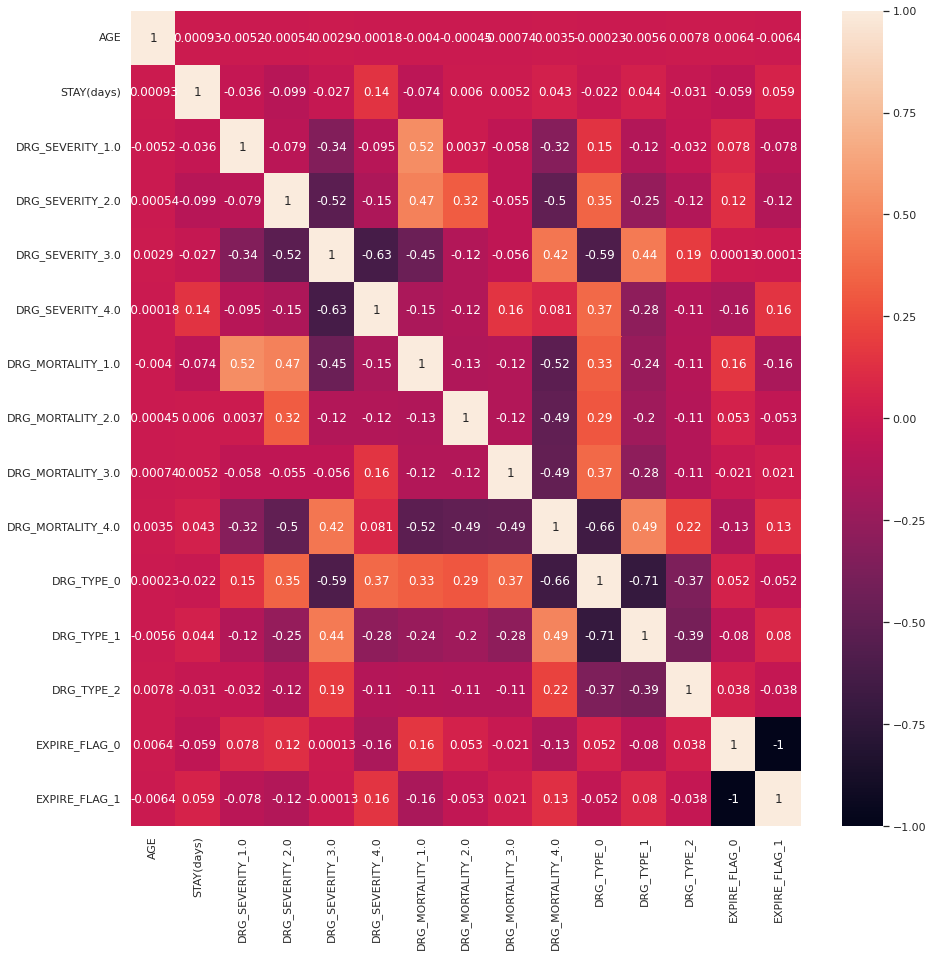

In [ ]:
import seaborn as sn
sn.set(rc={'figure.figsize':(15,15)})
sn.heatmap(data.corr(), annot=True)

In [ ]:
data.columns

Index(['AGE', 'STAY(days)', 'DRG_SEVERITY_1.0', 'DRG_SEVERITY_2.0',
       'DRG_SEVERITY_3.0', 'DRG_SEVERITY_4.0', 'DRG_MORTALITY_1.0',
       'DRG_MORTALITY_2.0', 'DRG_MORTALITY_3.0', 'DRG_MORTALITY_4.0',
       'DRG_TYPE_0', 'DRG_TYPE_1', 'DRG_TYPE_2', 'EXPIRE_FLAG_0',
       'EXPIRE_FLAG_1'],
      dtype='object')

In [ ]:
from keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input, Flatten, InputLayer, LeakyReLU
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import train_test_split
X = data.drop(columns=['EXPIRE_FLAG_0','EXPIRE_FLAG_1'],axis=1)
y = data[['EXPIRE_FLAG_0','EXPIRE_FLAG_1']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
x_train.shape

(32618, 13)

# Modeling

# ANN

In [ ]:
from tensorflow import keras
from keras.optimizers import Adam
from keras.metrics import AUC, Precision, Recall
model = keras.Sequential([
    Dense(64, input_shape=(x_train.shape[1],), activation='relu'),
    Dense(32, activation ='relu'),
    Dense(16, activation ='relu'),
    Dense(4, activation ='relu'),
    Dense(2, activation = 'sigmoid')
])
model.compile(optimizer=SGD(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(), Precision(), Recall()])

In [ ]:
model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=500,
    validation_batch_size=16
)

Epoch 1/500
255/255 [==============================] - 4s 4ms/step - loss: 0.6650 - accuracy: 0.6380 - auc: 0.6514 - precision: 0.6424 - recall: 0.5319
Epoch 2/500
255/255 [==============================] - 1s 4ms/step - loss: 0.6391 - accuracy: 0.6649 - auc: 0.6747 - precision: 0.6649 - recall: 0.6649
Epoch 3/500
255/255 [==============================] - 1s 4ms/step - loss: 0.6316 - accuracy: 0.6649 - auc: 0.7041 - precision: 0.6649 - recall: 0.6649
Epoch 4/500
255/255 [==============================] - 1s 5ms/step - loss: 0.6275 - accuracy: 0.6649 - auc: 0.7158 - precision: 0.6649 - recall: 0.6649
Epoch 5/500
255/255 [==============================] - 2s 7ms/step - loss: 0.6237 - accuracy: 0.6649 - auc: 0.7200 - precision: 0.6649 - recall: 0.6649
Epoch 6/500
255/255 [==============================] - 2s 6ms/step - loss: 0.6199 - accuracy: 0.6649 - auc: 0.7210 - precision: 0.6649 - recall: 0.6649
Epoch 7/500
255/255 [==============================] - 1s 4ms/step - loss: 0.6165 - accu

In [ ]:
model.compute_loss

<bound method Model.compute_loss of <keras.engine.sequential.Sequential object at 0x7f1ef5ad19a0>>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(max_depth=10, random_state=0)
forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
forest_model.score(x_test, y_test)

0.6811771919068056

In [ ]:
forest_model.score(x_train, y_train)

0.7116622723649518

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
clf.score(x_train, y_train)

0.6902937028634496

In [ ]:
clf.score(x_test, y_test)

0.6819129368485591